In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
import keras

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model=Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [4]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=["accuracy"])
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6500 - accuracy: 0.8384 - val_loss: 0.3599 - val_accuracy: 0.9021
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3420 - accuracy: 0.9039 - val_loss: 0.2971 - val_accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2946 - accuracy: 0.9163 - val_loss: 0.2682 - val_accuracy: 0.9248
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2646 - accuracy: 0.9252 - val_loss: 0.2445 - val_accuracy: 0.9312
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2419 - accuracy: 0.9319 - val_loss: 0.2271 - val_accuracy: 0.9360


In [5]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Testing Loss= %.3f"%test_loss)
print("Testing Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2271 - accuracy: 0.9360
Testing Loss= 0.227
Testing Accuracy=0.936


In [6]:
train_loss,train_acc=model.evaluate(x_train,y_train)
print("Training Loss= %.3f"%train_loss)
print("Training Accuracy=%.3f"%train_acc)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2290 - accuracy: 0.9356
Training Loss= 0.229
Training Accuracy=0.936


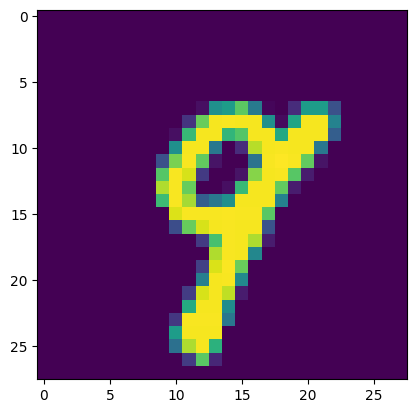

313/313 [==============================] - 1s 2ms/step
The handwritten number in the image is 9


In [7]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))

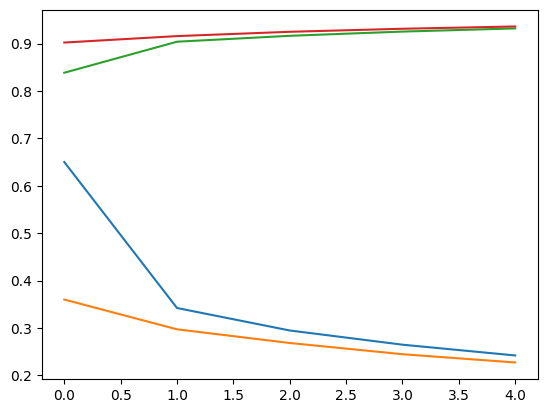

In [8]:
plt.plot(np.arange(0, 5), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), H.history["val_accuracy"], label="val_acc")